In [2]:
#Importamos las librerias necesarias
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=ac5e0df3f5006c646efce75ebb6fdc053834780e9de3f380950fded572eaacd2
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


### Iniciamos una sesión con pyspark

In [3]:
spark = SparkSession.builder \
    .appName("EDA con PySpark") \
    .getOrCreate()

**Cargamos el dataset**

In [5]:
df = spark.read.csv('machine_learning.csv', header=True, inferSchema=True)
df.show()

+---+------+-------+--------+------+---------+-----------+
|age|   sex|    bmi|children|smoker|   region|    charges|
+---+------+-------+--------+------+---------+-----------+
| 19|female|   27.9|       0|   yes|southwest|1.6884924E7|
| 18|  male|  33.77|       1|    no|southeast|  1725.5523|
| 28|  male|   33.0|       3|    no|southeast|  4449462.0|
| 33|  male|22705.0|       0|    no|northwest|21984.47061|
| 32|  male|  28.88|       0|    no|northwest|  3866.8552|
| 31|female|  25.74|       0|    no|southeast|  3756.6216|
| 46|female|  33.44|       1|    no|southeast|  8240.5896|
| 37|female|  27.74|       3|    no|northwest|  7281.5056|
| 37|  male|  29.83|       2|    no|northeast|  6406.4107|
| 60|female|  25.84|       0|    no|northwest|28923.13692|
| 25|  male|  26.22|       0|    no|northeast|  2721.3208|
| 62|female|  26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|   34.4|       0|    no|southwest|  1826843.0|
| 56|female|  39.82|       0|    no|southeast| 11090.717

**Obtenemos la información del dataset**

In [6]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



**Resumen estadistico de las variables numericas**

In [7]:
df.describe().show()

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|  6965.46679372197|  1.0949177877429|  null|     null|2737704.3202494443|
| stddev|14.049960379216147|  null|12755.236033095629|1.205492739781914|  null|     null| 7223086.852703424|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|           44745.0|                5|   yes|southwest|       4.8173361E7|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



**Contamos los valores unicos de cada columna**

In [8]:
df.select(*(col(c).alias(c.replace(' ', '_')) for c in df.columns)).distinct().show()

+---+------+-------+--------+------+---------+-----------+
|age|   sex|    bmi|children|smoker|   region|    charges|
+---+------+-------+--------+------+---------+-----------+
| 19|  male|   24.6|       1|    no|southwest|  1837237.0|
| 54|female|   30.8|       3|    no|southwest|   12105.32|
| 18|  male|  17.29|       2|   yes|northeast| 12829.4551|
| 29|  male|  29.64|       1|    no|northeast|20277.80751|
| 34|  male|  25.27|       1|    no|northwest|  4894.7533|
| 61|female|  25.08|       0|    no|southeast|24513.09126|
| 59|female|23655.0|       0|   yes|northwest|25678.77845|
| 47|  male|   32.3|       1|    no|southwest|  8062764.0|
| 39|female|23275.0|       3|    no|northeast| 7986.47525|
| 21|  male|  26.03|       0|    no|northeast|  2102.2647|
| 62|female|  32.68|       0|    no|northwest| 13844.7972|
| 44|female|20235.0|       1|   yes|northeast|19594.80965|
| 51|female|33915.0|       0|    no|northeast| 9866.30485|
| 33|female|  39.82|       1|    no|southeast|  4795.656

### Visualizamos la distribución de las variables numéricas

In [9]:
#Convertimos el  DataFrame a Pandas para visualización con Seaborn
df_pd = df.toPandas()

**Histograma de la edad**

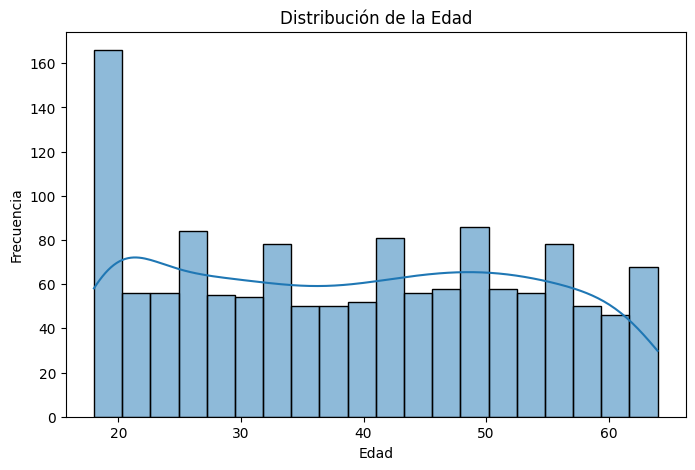

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df_pd['age'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Graficamos los cargos**

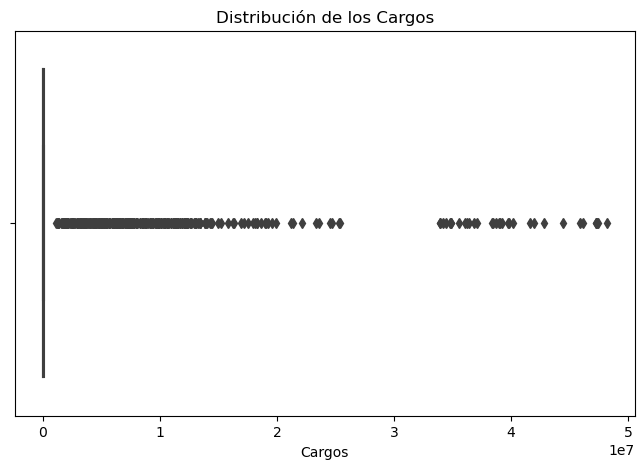

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_pd, x='charges')
plt.title('Distribución de los Cargos')
plt.xlabel('Cargos')
plt.show()

**Gráficos de dispersión entre edad y cargos**

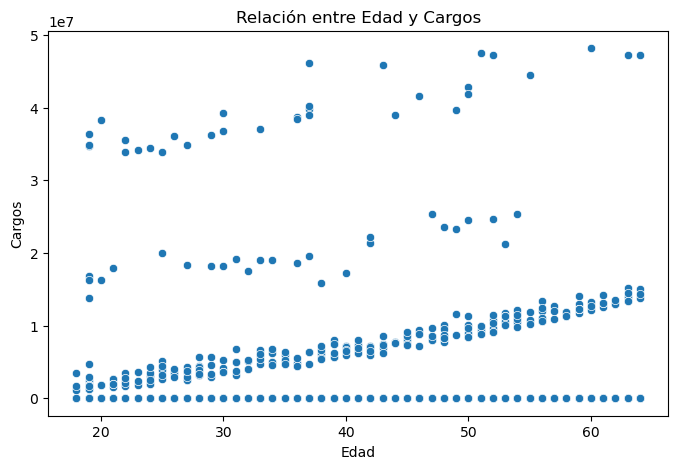

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pd, x='age', y='charges')
plt.title('Relación entre Edad y Cargos')
plt.xlabel('Edad')
plt.ylabel('Cargos')
plt.show()

**Gráficos de dispersión con hue en función de su genero**

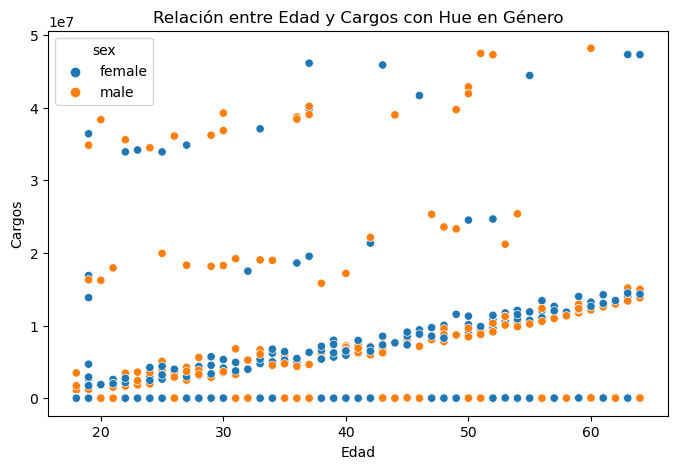

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pd, x='age', y='charges', hue='sex')
plt.title('Relación entre Edad y Cargos con Hue en Género')
plt.xlabel('Edad')
plt.ylabel('Cargos')
plt.show()

### Analizamos variables categoricas

**Contamos la cantidad de personas por región**

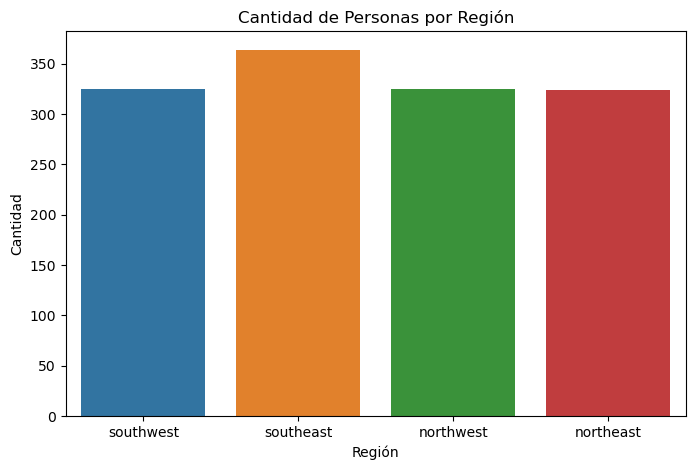

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_pd, x='region')
plt.title('Cantidad de Personas por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.show()

**Graficamos los fumadores por genero**

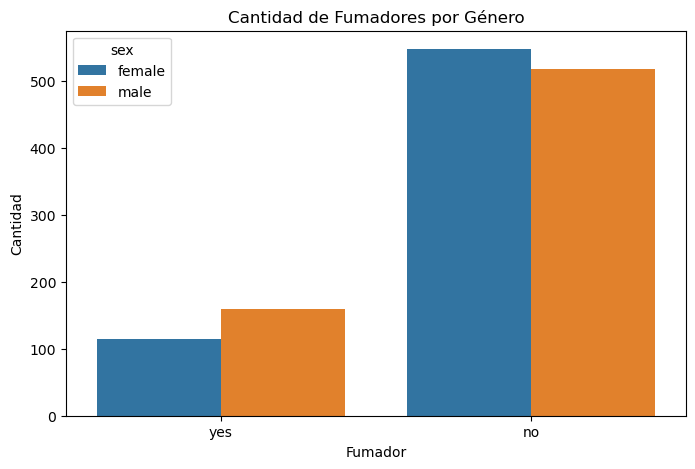

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_pd, x='smoker', hue='sex')
plt.title('Cantidad de Fumadores por Género')
plt.xlabel('Fumador')
plt.ylabel('Cantidad')
plt.show()

### Analizamos las correlaciones entre variables

In [ ]:
#Conversión del DataFrame a Pandas para visualización con Seaborn
df_corr_pd = df.toPandas().drop('region', axis=1)

**Matriz de correlación**

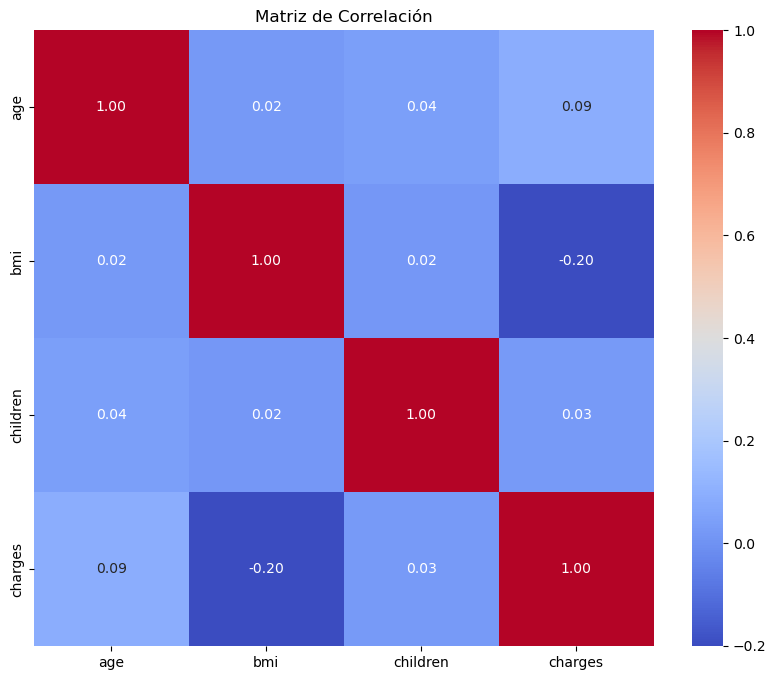

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_pd.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Tratamos los valores faltantes y duplicados

**Verificamos si hay valores faltantes**

In [ ]:
df.filter(col('charges').isNull()).show()

+---+---+---+--------+------+------+-------+
|age|sex|bmi|children|smoker|region|charges|
+---+---+---+--------+------+------+-------+
+---+---+---+--------+------+------+-------+



## Machine Learning

In [11]:
#Importamos las librerías necesarias para trabajar
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression

**Convertimos el dataframe a un datafreme de Spark**

In [12]:
df = spark.createDataFrame(df_pd)

**Convertimos las variables categóricas a índices numéricos usando StringIndexer**

In [13]:
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(df) for col in ["sex", "smoker", "region"]]
for indexer in indexers:
    df = indexer.transform(df)

**Utilizamos VectorAssembler para combinar todas las características en una sola columna de vectores**

In [14]:
assembler = VectorAssembler(inputCols=["age", "sex_index", "bmi", "children", "smoker_index", "region_index"], outputCol="features")
df = assembler.transform(df)

**Aplicamos StandardScaler para estandarizar las características**


In [15]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

**Seleccionamos las columnas requeridas para el modelo (objetivo: charges y características: scaled_features)**

In [16]:
df = df.select("charges", "scaled_features")

**Dividir el conjunto de datos en entrenamiento y prueba**

In [17]:
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)


**Creamos y entrenamos el modelo de regresión lineal**

In [18]:
lr = LinearRegression(featuresCol="scaled_features", labelCol="charges")
lr_model = lr.fit(train_data)

**Imprimimos los coeficientes y el término de intercepción**

In [19]:
print("Coeficientes: ", lr_model.coefficients)
print("Intercepto: ", lr_model.intercept)

Coeficientes:  [802271.230996205,1841.763381373401,-1793733.7125095848,253329.08438517293,2230675.900741447,1341635.0015774842]
Intercepto:  -1513349.7527875805


**Realizamos las  predicciones en el conjunto de prueba**

In [20]:
predictions = lr_model.transform(test_data)

**Mostramos algunas predicciones y los valores reales**

In [21]:
predictions.select("charges", "prediction").show()

+----------+-------------------+
|   charges|         prediction|
+----------+-------------------+
| 1149.3959| -491574.4380224069|
| 1607.5101| -484767.3490390136|
| 1621.3402|   756198.167567299|
|1632.03625| -2781634.580493759|
| 1646.4297|  753659.8457811095|
| 1705.6245|  3072377.269978946|
| 1837.2819|-205913.16677265754|
|2045.68525| -2610330.631726119|
| 2201.0971|-275085.74488237523|
|2203.47185|-1155589.9877838513|
|2207.69745| -1583096.814931583|
| 2219.4451| -276942.0245265693|
|2257.47525| -3255234.446590211|
|2457.21115|  -854353.118394959|
| 2689.4954|   80134.8294029655|
| 2801.2588| -66069.30759823974|
|3167.45585| 1096202.0038228042|
| 3935.1799|  423284.1418344686|
| 4185.0979|  371257.3868940675|
|4347.02335|  -546868.759941078|
+----------+-------------------+
only showing top 20 rows



**Calculamos el error cuadrático medio (RMSE)**

In [22]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("RMSE: ", rmse)

RMSE:  5622394.555938795
